# 2. DATASET DESCRIPTION
---

2.0. Load libraries and dataset

In [16]:
# LIBRARIES
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# DATASET
total_data = pd.read_csv('../data/interim/player_match_data.csv')

2.1. Data description

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   adr           946025 non-null  object 
 1   assists       946025 non-null  int64  
 2   deaths        946025 non-null  int64  
 3   fkdiff        946025 non-null  int64  
 4   hs            946025 non-null  int64  
 5   kdratio       946025 non-null  object 
 6   kills         946025 non-null  int64  
 7   match_id      946025 non-null  int64  
 8   player_id     946025 non-null  int64  
 9   rating        946025 non-null  float64
 10  data_unix     946025 non-null  int64  
 11  team_1_id     946025 non-null  int64  
 12  team_1_score  946025 non-null  int64  
 13  team_2_id     946025 non-null  int64  
 14  team_2_score  946025 non-null  int64  
 15  map           946025 non-null  object 
 16  hour          946025 non-null  int64  
 17  day           946025 non-null  int64  
 18  week

The clean dataset has 946.025 rows and 21 columns. 

- 17 out of 21 columns are numerical values columns.
- 3 out of 21 columns are object values columns.
- the column left is a float value column.
- There is no predictor yet to analyze. 
- There is no null values 

2.2. Data Measures

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,946025.000,4.218,2.491,0.000,2.000,4.000,6.000,25.000
deaths,946025.000,17.723,4.818,0.000,15.000,18.000,20.000,69.000
fkdiff,946025.000,-0.004,2.441,-13.000,-2.000,0.000,2.000,15.000
hs,946025.000,8.021,3.882,0.000,5.000,8.000,10.000,39.000
kills,946025.000,17.680,6.344,0.000,13.000,17.000,22.000,79.000
match_id,946025.000,66957.492,31130.436,12838.000,40066.000,66914.000,93775.000,121306.000
player_id,946025.000,9786.233,4810.605,1.000,7463.000,9342.000,12849.000,21025.000
rating,946025.000,1.049,0.343,0.000,0.810,1.030,1.260,3.450
data_unix,946025.000,1523311912146.926,60950172812.299,1347562800000.000,1481375700000.000,1526335200000.000,1571641500000.000,1622397600000.000
team_1_id,946025.000,7328.954,1815.925,3180.000,5988.000,7182.000,8637.000,11158.000


After watching the results, seems that there are no 0 values that could be a wrong data extraction. All data seems to be OK.

2.3. Data duplicates

In [12]:
total_data.drop(["match_id"],axis=1).duplicated().sum()
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.shape

(945865, 22)

After dropping duplicate rows, seems that 160 columns were deleted, leaving a total of 945.865 rows.

2.4. Review

In [13]:
total_data.head(4)

,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,player_id,rating,...,team_1_score,team_2_id,team_2_score,map,hour,day,week,month,year,weekday
0,163.2,3,10,1,10,90.0%,32,32227,5736,2.440,...,4,6621,16,Train,13,2,26,7,2016,5
1,81.0,3,6,1,5,75.0%,17,32227,2532,1.550,...,4,6621,16,Train,13,2,26,7,2016,5
2,77.6,3,10,1,11,75.0%,16,32227,7382,1.410,...,4,6621,16,Train,13,2,26,7,2016,5
3,77.0,2,10,-1,6,85.0%,14,32227,5698,1.380,...,4,6621,16,Train,13,2,26,7,2016,5


2.5. Plot num histograms

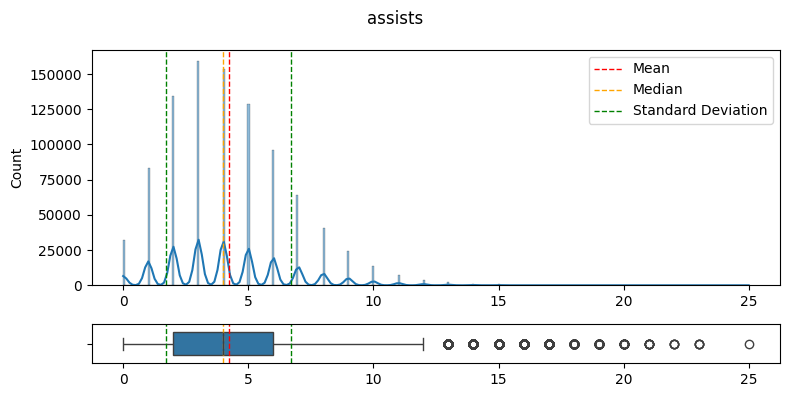

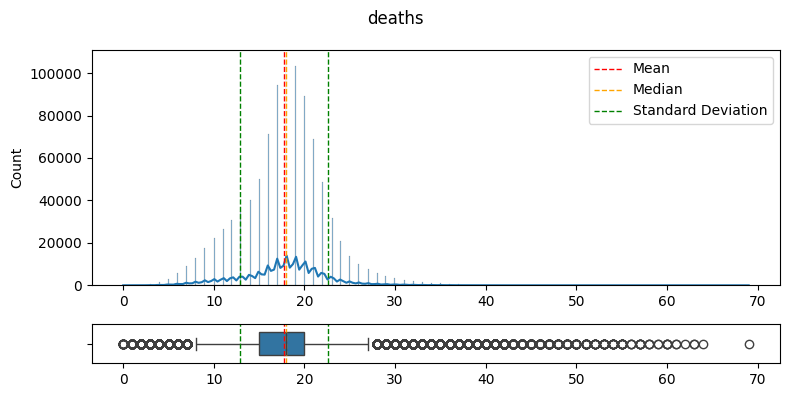

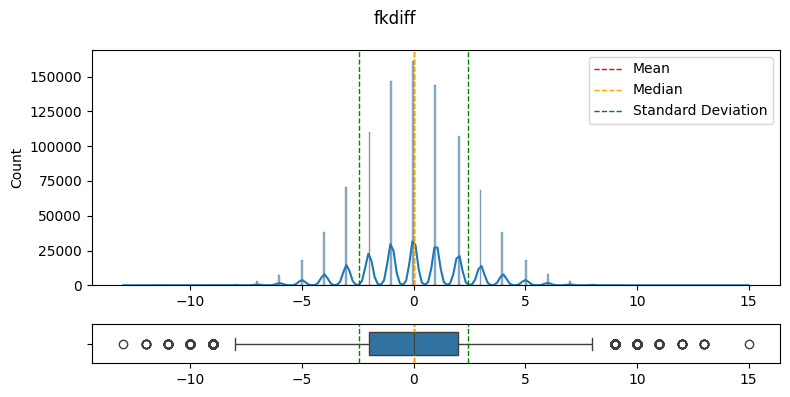

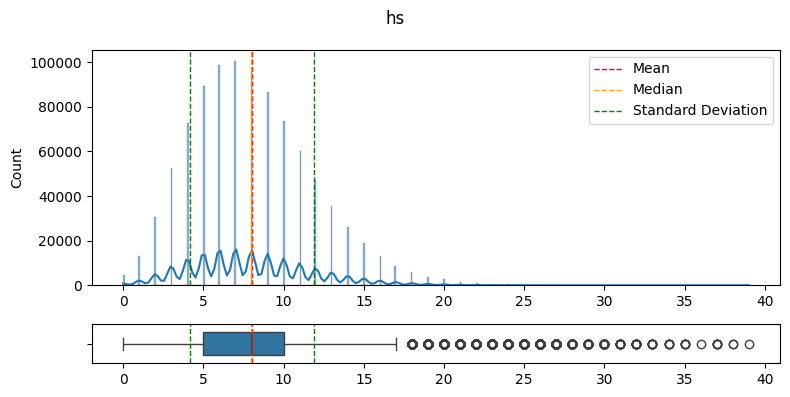

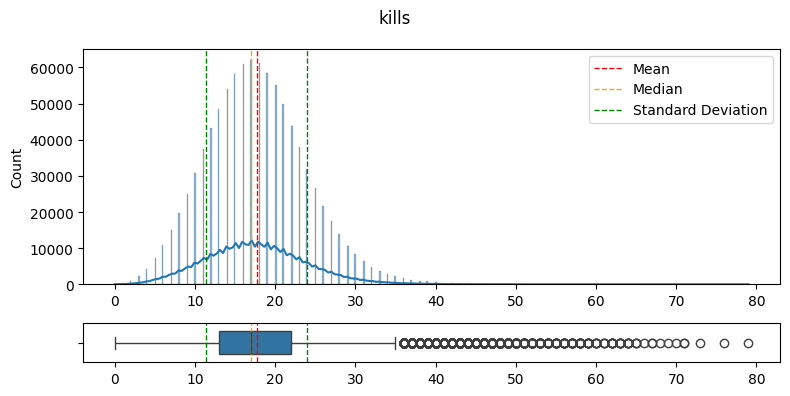

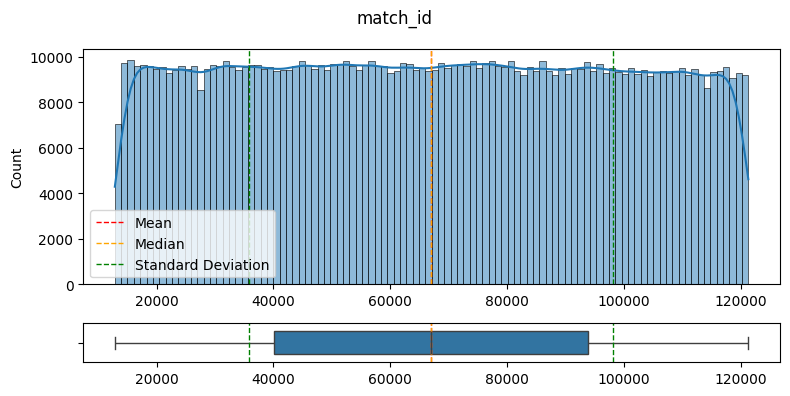

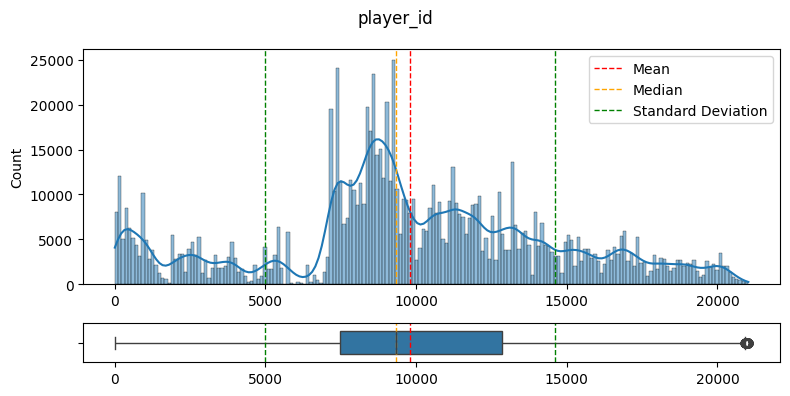

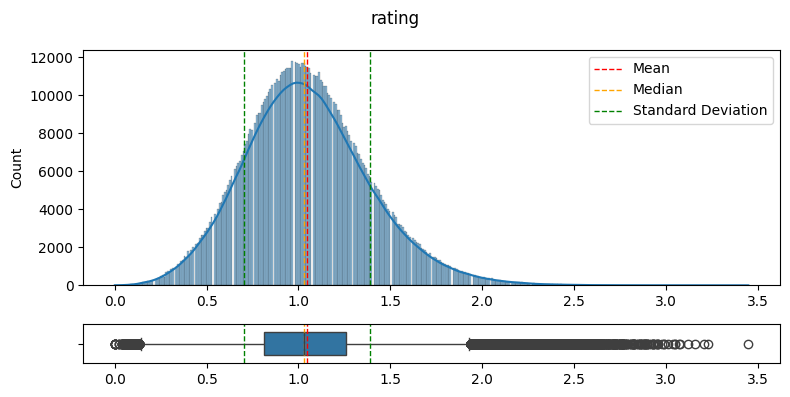

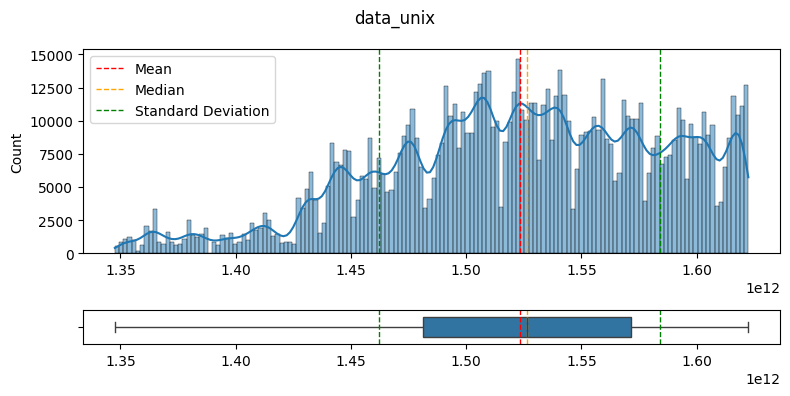

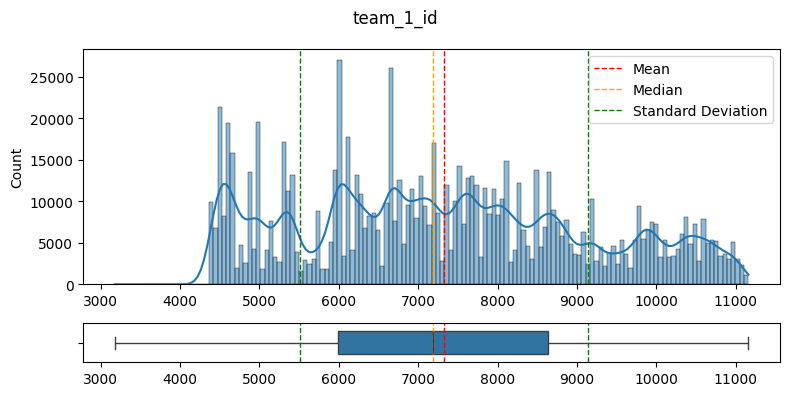

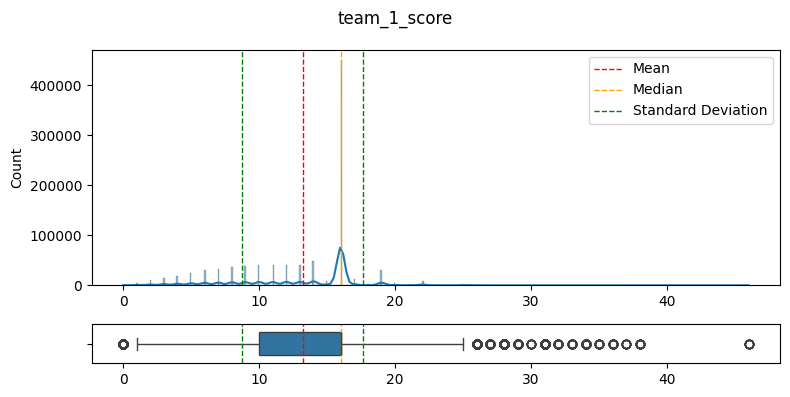

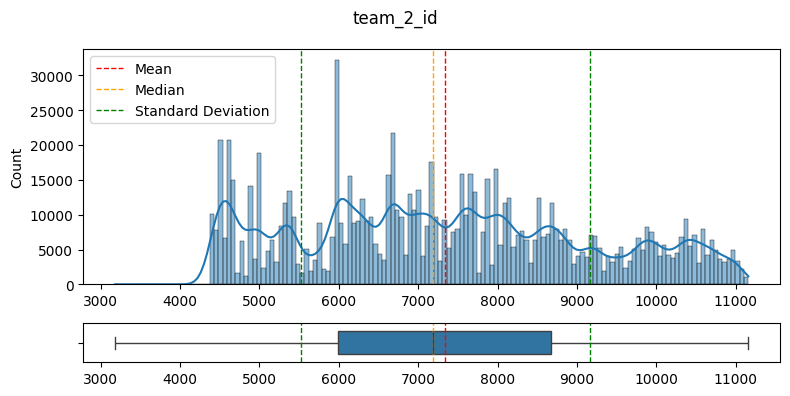

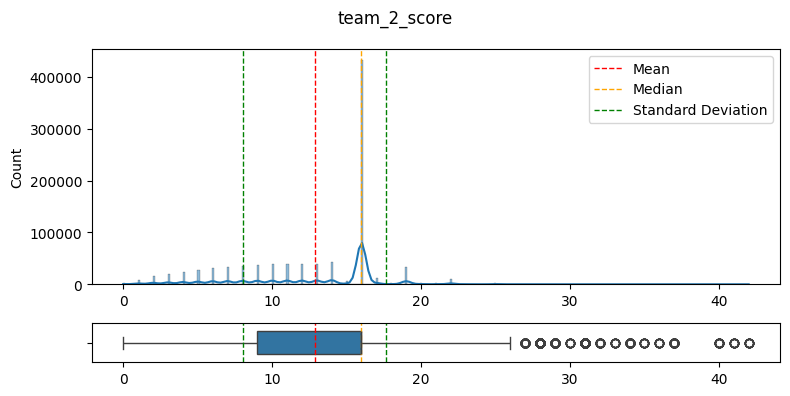

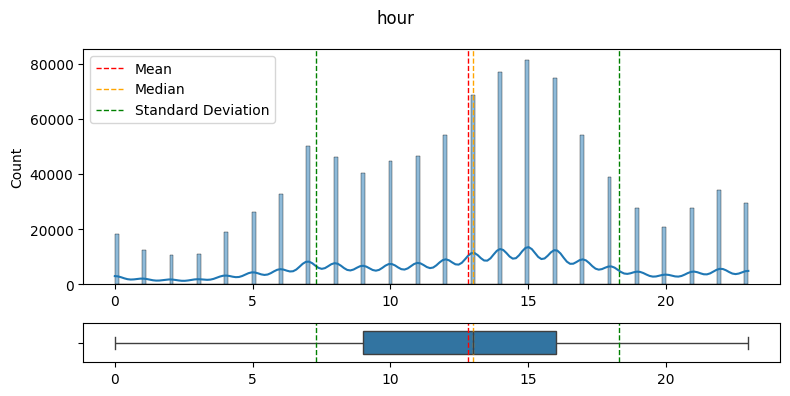

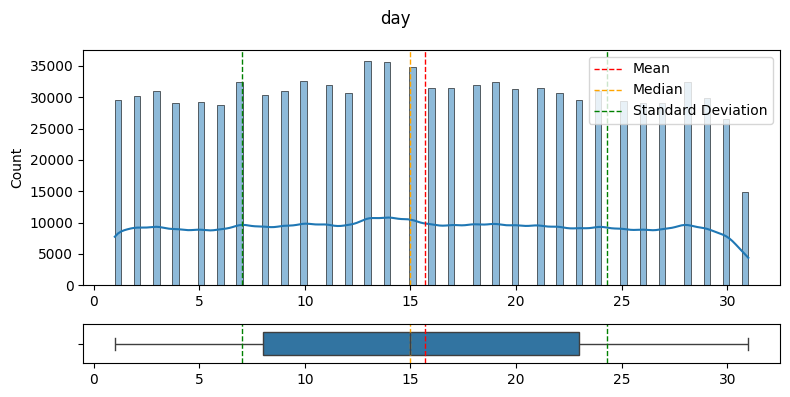

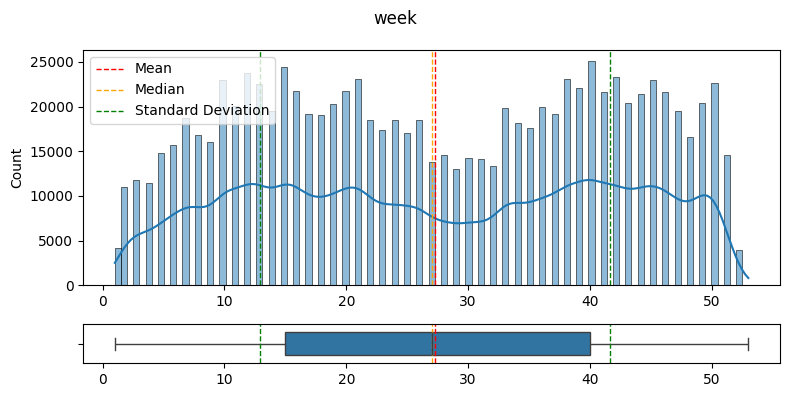

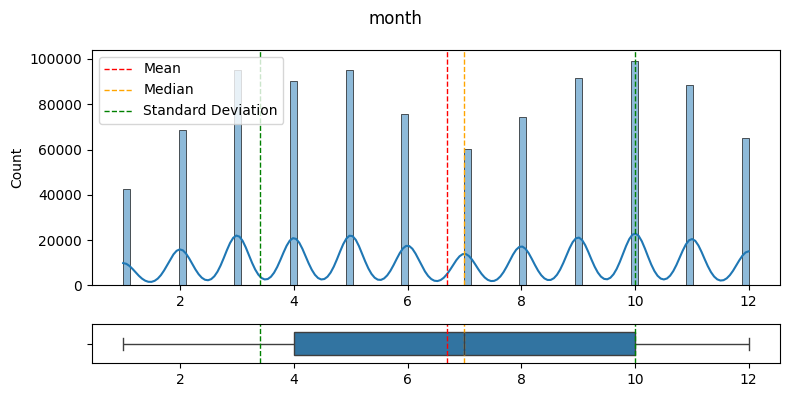

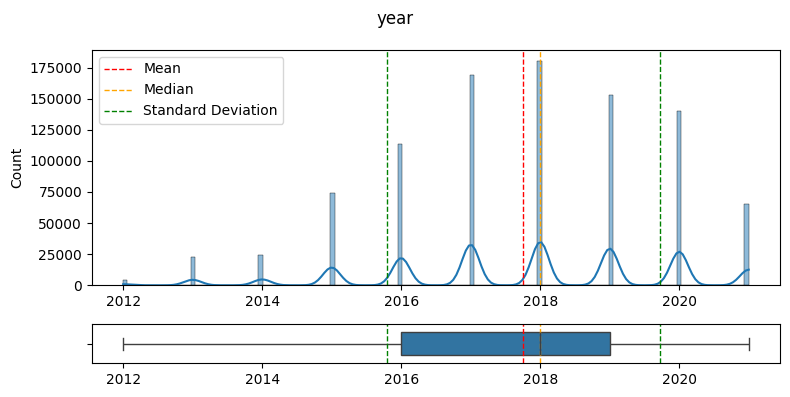

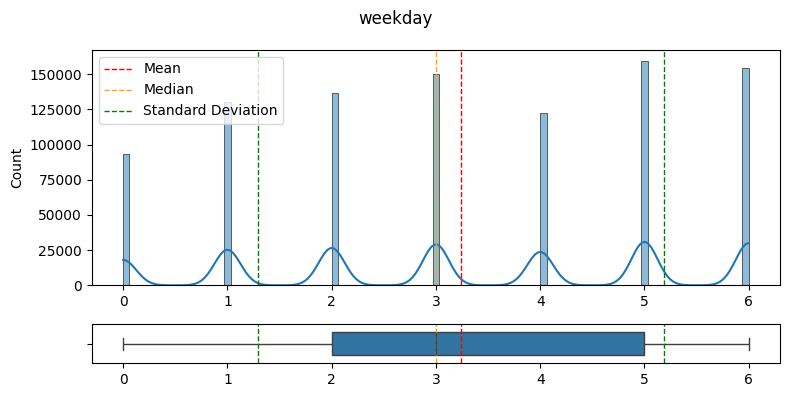

In [17]:
def plot_numerical_data(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns  
    for column in numerical_columns:
        fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]}) 
        # Calculate mean, median, and standard deviation
        mean_val = np.mean(dataframe[column])
        median_val = np.median(dataframe[column])
        std_dev = np.std(dataframe[column])

        # Create a multiple subplots with histograms and box plots
        sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
        axis[0].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[0].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[0].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1, label='Standard Deviation')
        axis[0].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        sns.boxplot(ax=axis[1], data=dataframe, x=column, width=0.6).set(xlabel=None)
        axis[1].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[1].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[1].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1)
        axis[1].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        axis[0].legend()  
        fig.suptitle(column)
        plt.tight_layout()
        plt.show()

# Assuming total_data is your DataFrame
plot_numerical_data(total_data)

2.6. Plot categoric histograms

2.7. Save clean data

---

## Conclusions